In [1]:
!pip install statsmodels

In [2]:
import numpy as np #linear algebra

In [3]:
import pandas as pd # for processing data

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
import statsmodels.api as sm  

In [52]:
path = r"C:\Users\HP\OneDrive\Projects\NHANES.csv"
da = pd.read_csv(path)

In [53]:
da.head(4)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0


In [54]:
da.shape

(5735, 28)

In [55]:
data = da.loc[:,('SEQN','SMQ020','RIAGENDR','RIDAGEYR','DMDEDUC2','BMXWT','BMXHT','BMXBMI')]

In [56]:
data.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


In [58]:
data.columns = ['seqn','smoking','gender','age','education','weight','height','bmi']
data.head()

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [59]:
data.shape

(5735, 8)

In [60]:
duplicateRowsDF = data[data.duplicated()] #Check for duplicates

In [61]:
duplicateRowsDF

,seqn,smoking,gender,age,education,weight,height,bmi


In [62]:
data.drop(columns = 'seqn',inplace = True)

In [63]:
data.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


In [64]:
#check for missing data

In [65]:
data.isnull().sum()

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

In [66]:
data.shape

(5735, 7)

In [67]:
data.dropna(inplace = True)

In [68]:
data.shape

(5406, 7)

In [69]:
numerical = ['age','height','weight','bmi']

In [70]:
data[numerical].describe()

,age,height,weight,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,166.055679,81.715594,29.541861
std,17.640915,10.107149,21.775173,7.076574
min,20.000000,129.700000,32.400000,14.500000
25%,34.000000,158.600000,66.300000,24.500000
50%,49.000000,165.900000,78.500000,28.500000
75%,64.000000,173.400000,93.200000,33.200000
max,80.000000,202.700000,198.900000,67.300000


In [71]:
ages = data["age"]

counts, bin_edges = np.histogram(ages, bins=15)

print("Counts:", counts)
print("Bin edges:", bin_edges)

Counts: [329 399 392 373 352 367 362 367 375 318 417 331 295 232 497]
Bin edges: [20. 24. 28. 32. 36. 40. 44. 48. 52. 56. 60. 64. 68. 72. 76. 80.]


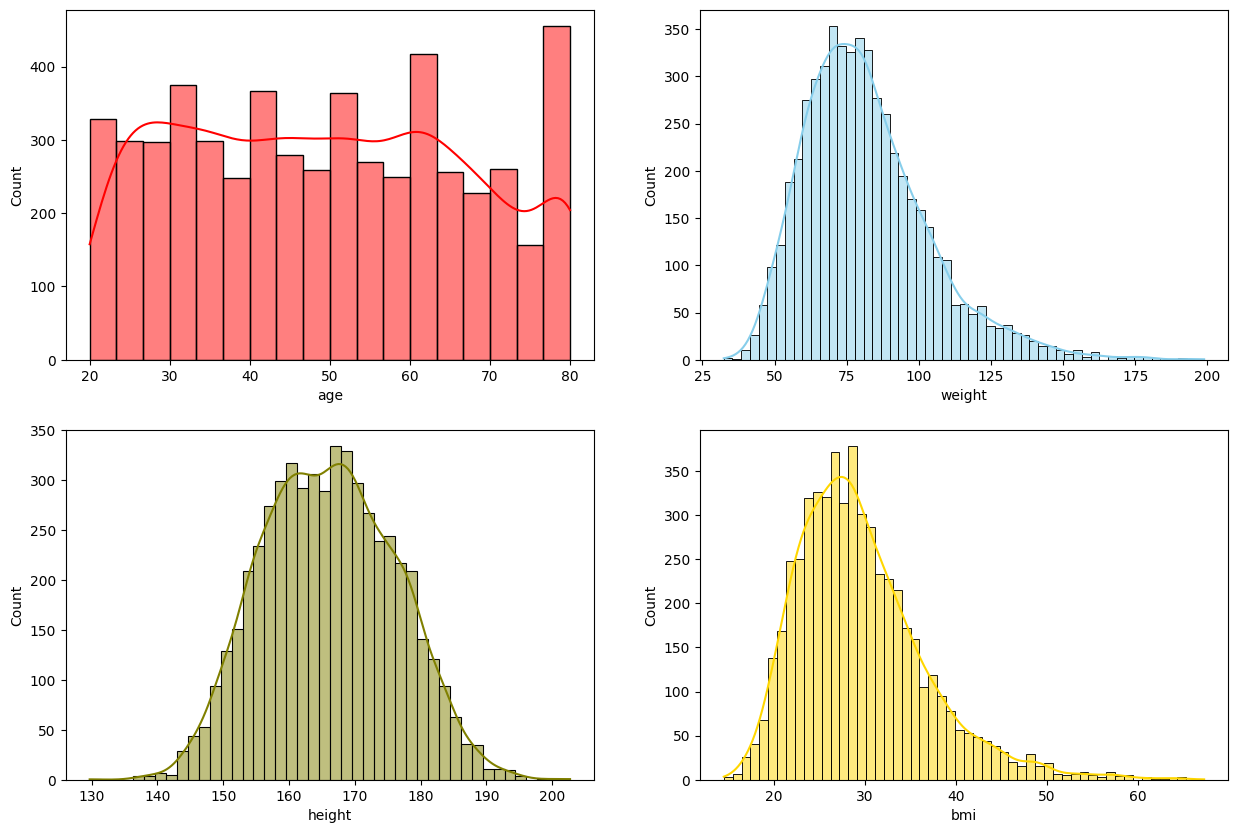

In [72]:
# Create histogram for numerical variable
fig, axs = plt.subplots(2,2, figsize=(15, 10))
      
sns.histplot(data= data, x="age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[1,1])

plt.show()

In [73]:
ages=data["age"]
ages_sorted = ages.sort_values()
Q1 = ages.quantile(0.25)
Q2 = ages.quantile(0.50)
Q3 = ages.quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("Lower whisker limit:", lower_whisker)
print("Upper whisker limit:", upper_whisker)

Lower whisker limit: -11.0
Upper whisker limit: 109.0


In [74]:
lower_whisker_value = ages[ages >= lower_whisker].min()
upper_whisker_value = ages[ages <= upper_whisker].max()

print("Lower whisker value:", lower_whisker_value)
print("Upper whisker value:", upper_whisker_value)


Lower whisker value: 20
Upper whisker value: 80


<Axes: xlabel='bmi'>

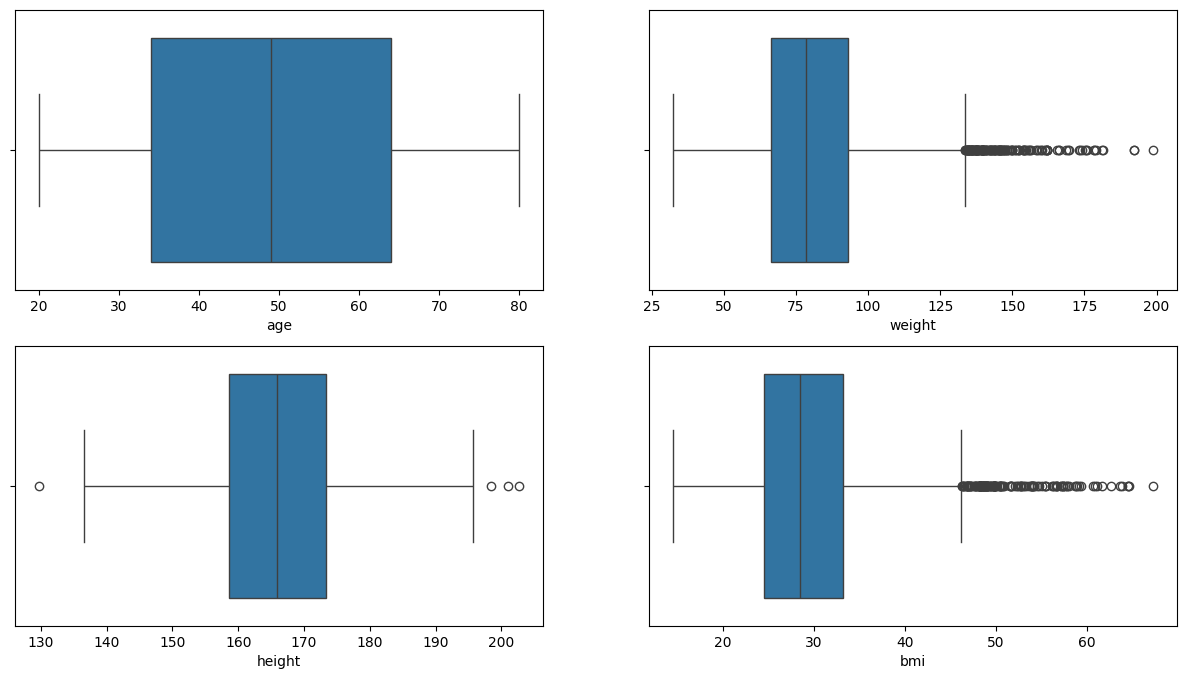

In [75]:
# Create boxplot to observe distribution of numerical value
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(x = data['age'], ax = axs[0,0])
sns.boxplot(x = data['weight'], ax = axs[0,1])
sns.boxplot(x = data['height'], ax = axs[1,0])
sns.boxplot(x = data['bmi'], ax = axs[1,1])

In [76]:
# Height
qh25, qh50, qh75 = np.percentile(data['height'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Choosing the data inside IQR
data = data[(data['height'] > minh) & (data['height'] < maxh)]

In [77]:
# Weight
qw25, qw50, qw75 = np.percentile(data['weight'], [25,50,75])
iqrw = qw75-qw25
maxw = qh75 + 1.5*iqrw

#Choosing the data inside IQR (only data below the max value of weight since the data is right-skewed)
data = data[data['weight'] < maxw]

In [78]:
# BMI
qb25, qb50, qb75 = np.percentile(data['bmi'], [25,50,75])
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Choosing the data inside IQR (only data below the max value of bmi since the data is right-skewed)
data = data[data['bmi'] < maxb]

In [79]:
data.shape

(5252, 7)

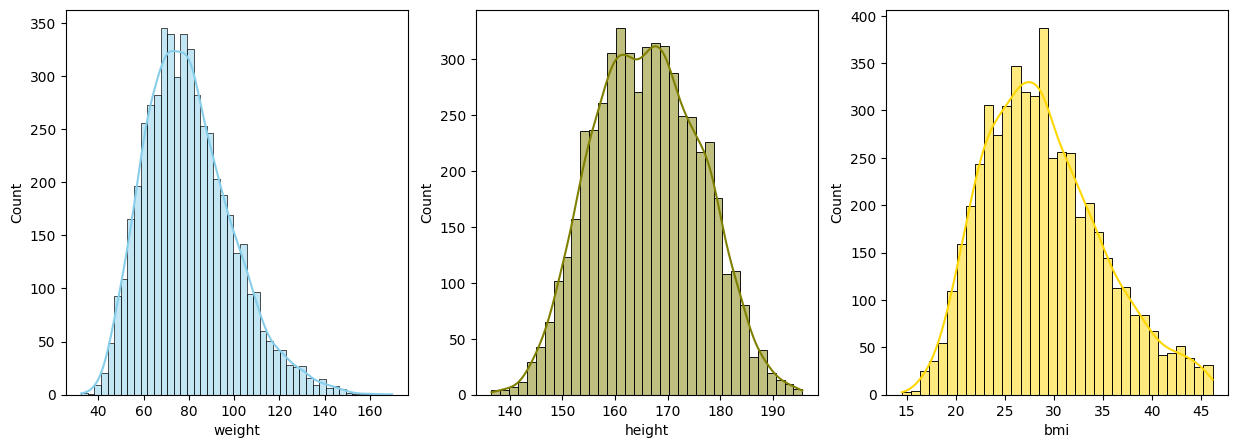

In [80]:
#Distribution through histogram after removing outliers 
fig, axs = plt.subplots(1,3, figsize=(15, 5))
      
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[2])

plt.show()

<Axes: xlabel='bmi'>

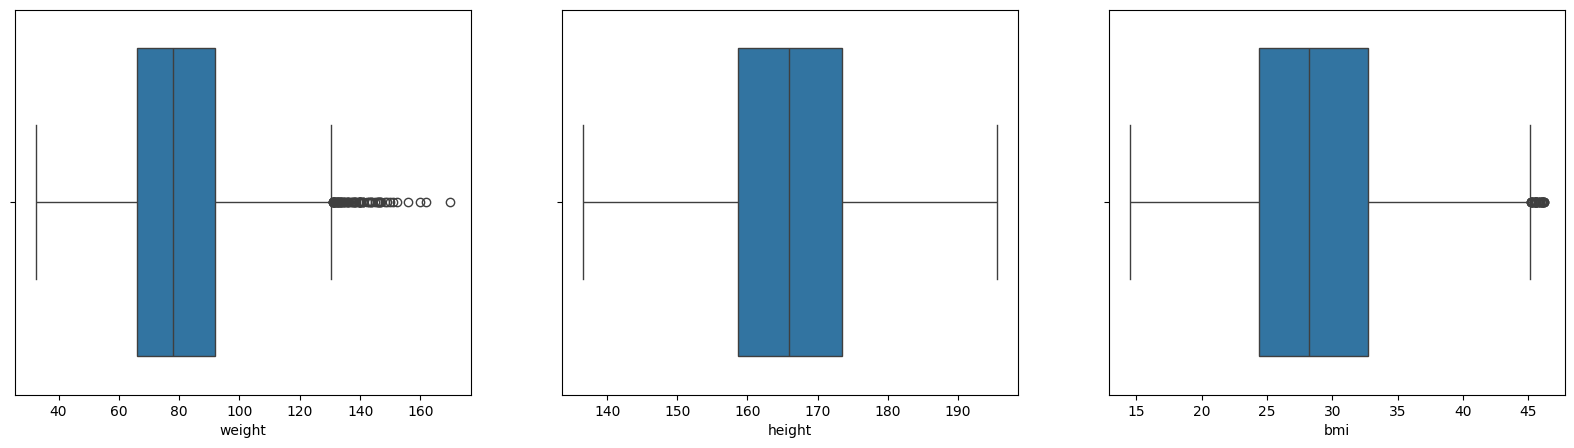

In [81]:
# Boxplot after removal of outliers
fig, axs = plt.subplots(1,3, figsize=(20,5))
sns.boxplot(x = data['weight'], ax = axs[0])
sns.boxplot(x = data['height'], ax = axs[1])
sns.boxplot(x = data['bmi'], ax = axs[2])

In [82]:
#smoking
data["smoking"] = data["smoking"].replace({1:'yes',2:'no',7:np.nan,9:np.nan})
#gender
data['gender'] = data['gender'].replace({1:'male',2:'female'})
#education
data['education'] = data.education.replace({1 : '<8th grade', 2 : '10th grade',
                                           3 : 'HS or GED', 4 : 'graduate',
                                           5 : 'post graduate', 7 : 'Other',
                                           8 : 'Other'})

In [83]:
categorical = data[['smoking','gender','education']]
categorical.head()

,smoking,gender,education
0,yes,male,post graduate
1,yes,male,HS or GED
2,yes,male,HS or GED
3,no,female,post graduate
4,no,female,graduate


In [84]:
#get dummies for categorical data
dummy = pd.get_dummies(categorical,drop_first = True)
dummy

,smoking_yes,gender_male,education_10th grade,education_<8th grade,education_HS or GED,education_graduate,education_post graduate
0,True,True,False,False,False,False,True
1,True,True,False,False,True,False,False
2,True,True,False,False,True,False,False
3,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
5730,True,False,False,False,True,False,False
5731,False,True,False,False,False,False,True
5732,True,False,False,False,False,True,False
5733,True,True,False,True,False,False,False


In [85]:
# Checking the skewness of numerical variables
numerical = data[['age', 'weight','height','bmi']]
skew_limit = 0.75 
skew_vals = numerical.skew()
skew_vals

age       0.107088
weight    0.653454
height    0.077404
bmi       0.520106
dtype: float64

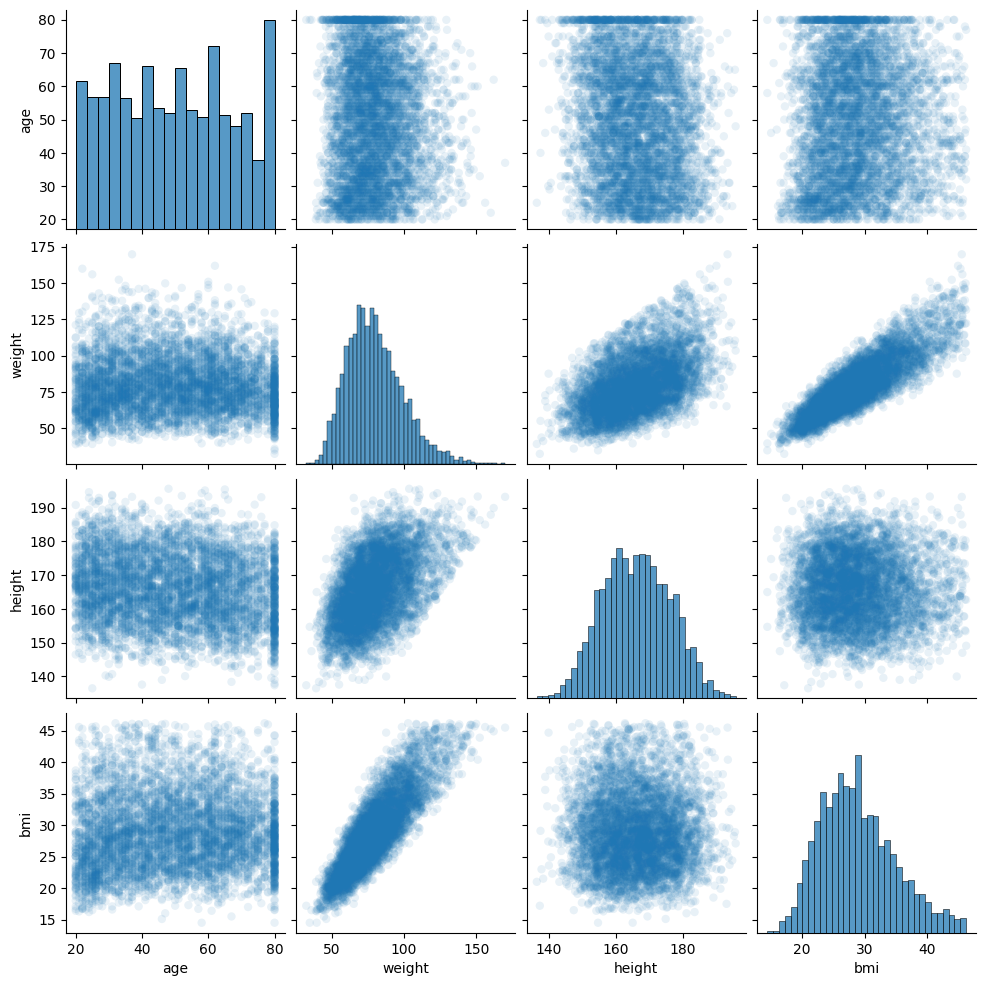

In [86]:
# Pairplot of numerical variables for determining the correlation between the variables
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

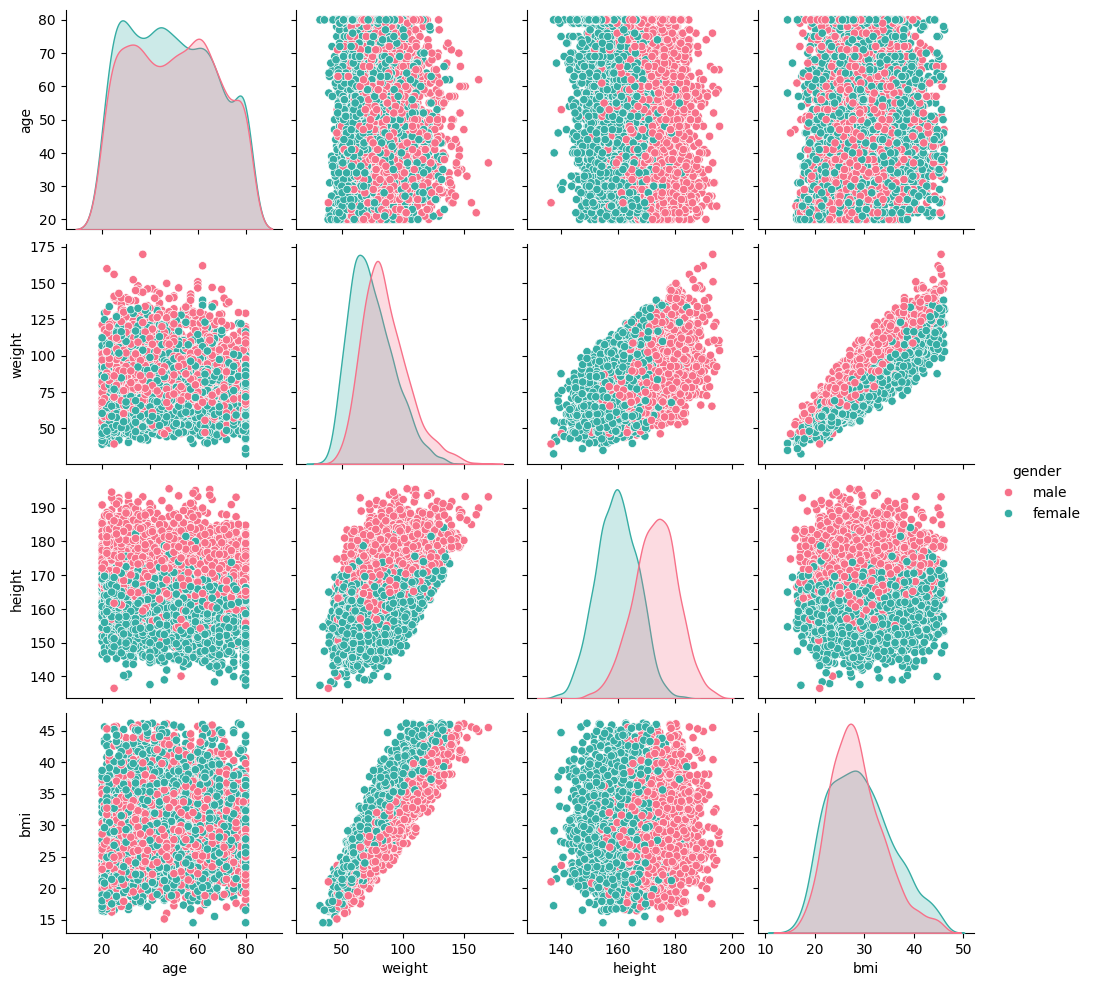

In [87]:
# Pairplot of numerical variables divided by gender
sns.pairplot(data, hue = 'gender', palette = 'husl')

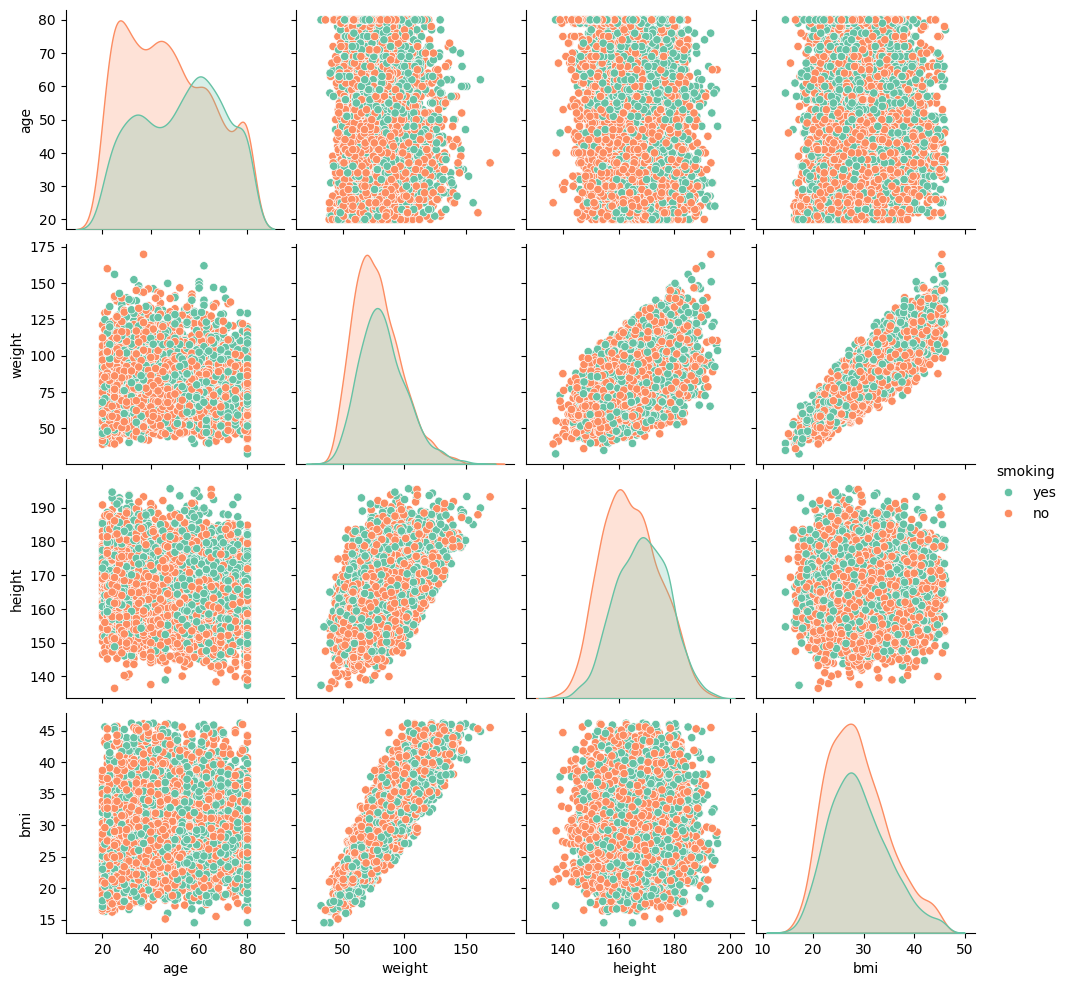

In [88]:
# # Pairplot of numerical variables divided by smoking habit
sns.pairplot(data, hue = 'smoking', palette = 'Set2')

In [89]:
# Stratify the age
data['age'] = pd.cut(data.age, [18,30,40,50,60,70,80])

In [90]:
# Group categorical data
data_cat = data.groupby(['age','gender']).agg({'smoking': [lambda x : np.mean(x == 'yes'), np.size]})
data_cat.columns = ['proportion','size']
data_cat

C:\Users\HP\AppData\Local\Temp\ipykernel_3660\2295591951.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_cat = data.groupby(['age','gender']).agg({'smoking': [lambda x : np.mean(x == 'yes'), np.size]})


proportion  size
age      gender                  
(18, 30] female    0.234522   533
         male      0.375824   455
(30, 40] female    0.282222   450
         male      0.503401   441
(40, 50] female    0.262605   476
         male      0.447028   387
(50, 60] female    0.424036   441
         male      0.568849   443
(60, 70] female    0.382423   421
         male      0.651551   419
(70, 80] female    0.327456   397
         male      0.652956   389

In [91]:
 # Group numerical data
data_num = data[['gender','age','weight','height','bmi']]
data_num.groupby(['age','gender']).agg(['mean','std'])

C:\Users\HP\AppData\Local\Temp\ipykernel_3660\4260209834.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_num.groupby(['age','gender']).agg(['mean','std'])


weight                 height                  bmi  \
                      mean        std        mean       std       mean   
age      gender                                                          
(18, 30] female  71.971295  18.605828  161.450094  6.867726  27.558161   
         male    83.320879  19.261460  174.909890  7.701208  27.183297   
(30, 40] female  76.091111  19.726570  160.744444  7.207113  29.344889   
         male    88.335147  19.706370  174.084354  7.755265  29.067347   
(40, 50] female  77.595168  18.692238  160.225630  7.163041  30.174370   
         male    88.724548  19.747783  173.806202  7.563134  29.247028   
(50, 60] female  75.917007  16.789526  159.985261  6.917037  29.602041   
         male    86.674266  18.809328  172.935892  8.383587  28.866591   
(60, 70] female  75.776485  17.716172  158.029929  6.982854  30.254157   
         male    86.022196  18.078713  171.831742  7.290485  29.017422   
(70, 80] female  70.566247  15.371260  156.253401  6.688228  28.836272   
         male    81.334704  16.850614  170.379177  7.485395  27.899743   

                           
                      std  
age      gender            
(18, 30] female  6.624561  
         male    5.771789  
(30, 40] female  6.871599  
         male    5.684898  
(40, 50] female  6.717175  
         male    5.654652  
(50, 60] female  5.933152  
         male    5.282098  
(60, 70] female  6.356145  
         male    5.208027  
(70, 80] female  5.698754  
         male    4.847672

In [92]:
pd.crosstab(data.gender, data.age)

age,"(18, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
gender,,,,,,
female,533,450,476,441,421,397
male,455,441,387,443,419,389


In [93]:
#1. H01 = Female age 40-50 not obese
#2. H02 = Proportion of male smoker is no difference than the proportion of female smoker.
#3. H03 = BMI of male and female are similar.

In [94]:
#null hypothesis H01 : Female age 40-50 are not obese. (BMI = 30.174370)
#alternative hypothesis : Female age 40-50 are obese. (BMI > 30)

In [95]:
#Information about female age 40-50
mean_bmi = 30.174370
std_bmi = 6.717175
n_bmi = 476

In [96]:
# Standard Error of Mean
sem = mean_bmi/np.sqrt(n_bmi)

#t-value or z_score
t_value = (mean_bmi - 30) / sem 

print('sem:', sem, 't_value:', t_value)

sem: 1.3830399813886576 t_value: 0.12607733857767542


In [104]:
#H02
#Null hypothesis: Smoking is independent of gender
#Altenative hypothesis: Smoking depends on gender

In [97]:
ct = pd.crosstab(data['gender'], data['smoking'])
ct


smoking,no,yes
gender,,
female,1859,855
male,1183,1345


In [99]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(ct)

p_value


np.float64(8.661974800565796e-57)

In [100]:
male_bmi = data[data['gender'] == 'male']['bmi']
female_bmi = data[data['gender'] == 'female']['bmi']


In [105]:
#H03
#Null hypothesis: Mean of bmi of males and females are similar
#Alternative: Bmi of males andf females are different 

In [101]:
male_bmi.describe(), female_bmi.describe()


(count    2534.000000
 mean       28.533899
 std         5.475065
 min        15.100000
 25%        24.600000
 50%        27.900000
 75%        31.775000
 max        46.100000
 Name: bmi, dtype: float64,
 count    2718.000000
 mean       29.248050
 std         6.471288
 min        14.500000
 25%        24.200000
 50%        28.600000
 75%        33.500000
 max        46.200000
 Name: bmi, dtype: float64)

In [102]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    male_bmi,
    female_bmi,
    equal_var=False   # Welch's t-test
)

t_stat, p_value


(np.float64(-4.3272230736356985), np.float64(1.538319437481783e-05))